In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Read and Store all the Data 

In [ ]:
#reading and storing all csv files by mounting through drive
WC_Players_Data=pd.read_csv('/content/drive/MyDrive/PYTHON/WC_players.csv')
Ground_Data=pd.read_csv('/content/drive/MyDrive/PYTHON/Ground_Averages.csv')
Batsman_Data=pd.read_csv('/content/drive/MyDrive/PYTHON/Batsman_Data.csv')
Bowler_Data=pd.read_csv('/content/drive/MyDrive/PYTHON/Bowler_data.csv')
ODI_Total=pd.read_csv('/content/drive/MyDrive/PYTHON/ODI_Match_Totals.csv')
ODI_Results_Data=pd.read_csv('/content/drive/MyDrive/PYTHON/ODI_Match_Results.csv')
        

Finding India's Win Record against other Countries 

In [ ]:
India = ODI_Total[ODI_Total['Country']=='India']


In [ ]:
#Finding India's win record against all countires
India_win = India[India['Result']=='won']
India_win['Opposition'].value_counts()

v Sri Lanka       15
v West Indies     13
v Australia       12
v Zimbabwe        12
v South Africa    10
v England         10
v New Zealand      9
v Bangladesh       8
v Pakistan         6
v Hong Kong        1
v Ireland          1
v Afghanistan      1
v U.A.E.           1
Name: Opposition, dtype: int64

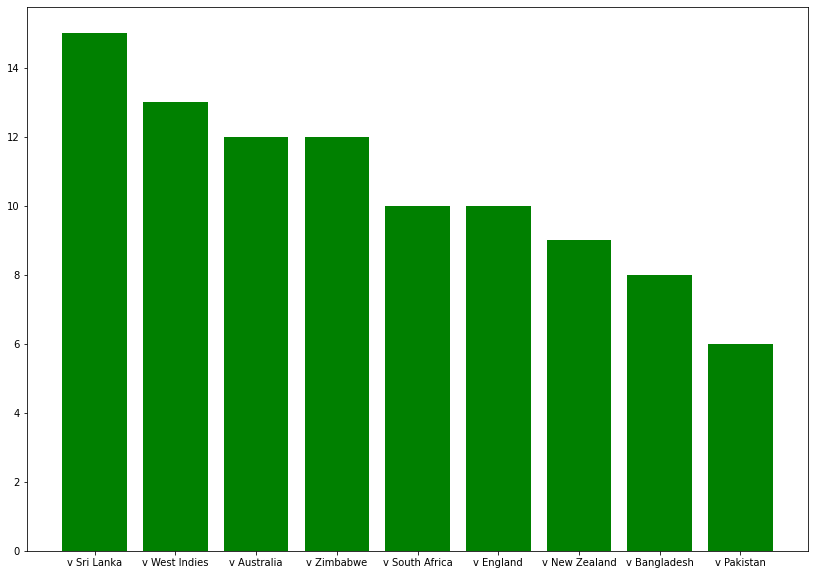

In [ ]:
#showing india's win record in a barplot graph
plt.figure(figsize=(14,10))
plt.bar(list(India_win['Opposition'].value_counts()[0:9].keys()),list(India_win['Opposition'].value_counts()[0:9]),color="g")
plt.show()  

Analysis: India has a better winning percentage against Sri Lanka, West Indies and Zimbabwe

Finding India's Loss Records againt other Countries

In [ ]:
#India's loss record against the other countries
India_loss = India[India['Result']=='lost']
India_loss['Opposition'].value_counts()

v Australia       13
v New Zealand      8
v England          8
v South Africa     6
v West Indies      5
v Sri Lanka        4
v Pakistan         3
v Bangladesh       2
Name: Opposition, dtype: int64

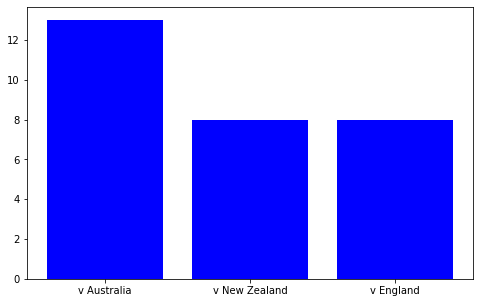

In [ ]:
#creating a barplot of India's top 3 toughest opposition
plt.figure(figsize=(8,5))
plt.bar(list(India_loss['Opposition'].value_counts()[0:3].keys()),list(India_loss['Opposition'].value_counts()[0:3]),color="b")
plt.show()

Analysis: Clearly India's toughest opposition are Australia,New Zealand and England

Since we are playing World Cup  in England, Let's analyze the England pitches and conditions and results over their grounds.

In [ ]:
#adding all the worldcup pitches 
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

In [ ]:
#appending all the stats of the pitches which are gonna played in worldcup
WC_Ground_Stats = []
ODI_Grounds = ODI_Total.Ground
for i in ODI_Grounds:
   for j in WC_venue_pitches:
        if i in j:
          WC_Ground_Stats.append((i,j))

In [ ]:
Ground_names = dict(set(WC_Ground_Stats))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'Birmingham': 'Edgbaston, Birmingham',
 'Bristol': 'County Ground, Bristol',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Leeds': 'Headingley, Leeds',
 "Lord's": "Lord's, London",
 'Manchester': 'Old Trafford, Manchester',
 'Nottingham': 'Trent Bridge, Nottingham',
 'Southampton': 'Rose Bowl, Southampton',
 'The Oval': 'The Oval, London'}

In [ ]:
WC_Grounds_History = ODI_Total[ODI_Total.Ground.isin(Ground[0] for Ground in WC_Ground_Stats)]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)

Finding How many Countries have played a number of matches in England (It shows how players are experienced in the playing conditions as they have a massive advantage)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

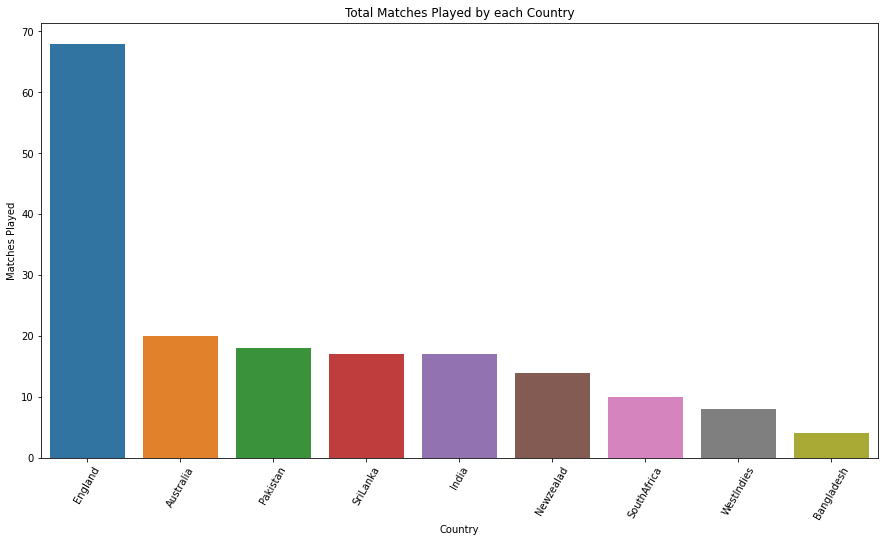

In [ ]:
#plotting barplot for countries having played in these conditions
Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)

Analysis: England has a massive advantage playing in these conditions as they are the home side

Does Batting First or Second matters in these pitches?

Text(0, 0.5, 'Winning Percentage')

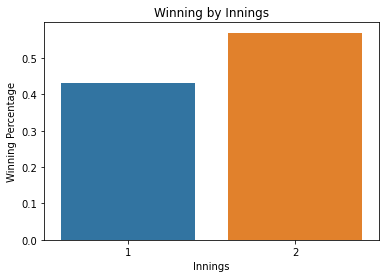

In [ ]:
#which inning has more win percentage
Innings_Wins = WC_Grounds_History[WC_Grounds_History.Result == "won"].Inns.value_counts(normalize = True).reset_index()
sns.barplot(x = "index", y = "Inns", data = Innings_Wins).set_title("Winning by Innings")
plt.xlabel("Innings")
plt.ylabel("Winning Percentage")

Analysis: Those Teams which Bowl First has won around 57% of the matches and clearly has an advantage.



Now let's Divide them by Pitches and see the Winning Percentage of an innings


In [ ]:
#showing the innings win diffrence of all the pitches 
Pitch_Innings = WC_Grounds_History[WC_Grounds_History.Result == "won"][["Inns","Ground"]]
Pitch_Innings["Count"] = 1
Pitch_Innings = Pitch_Innings.groupby(["Ground","Inns"]).sum()
Pitch_Innings = Pitch_Innings.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Pitch_Innings.columns = ["Ground", "Inns","Wins"]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

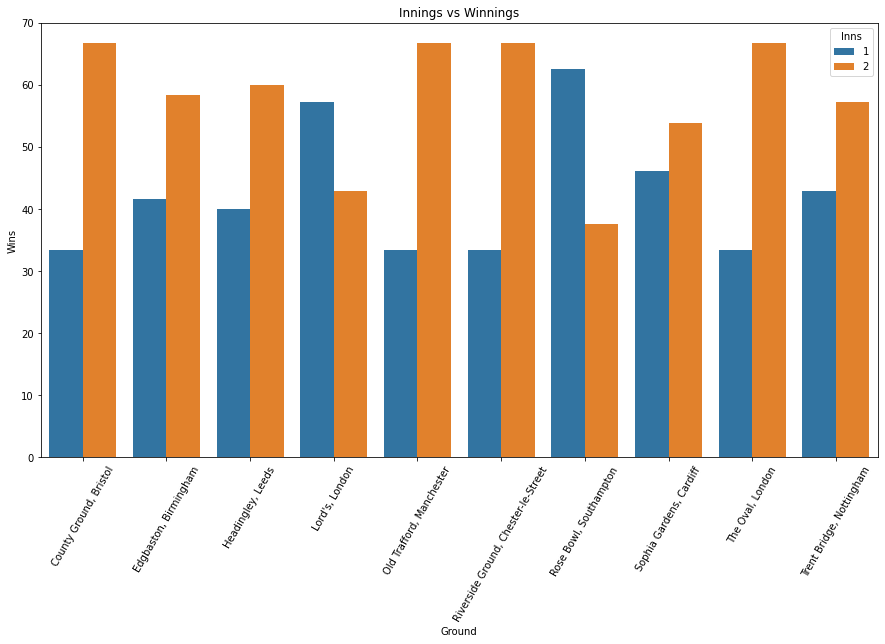

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Wins", hue = "Inns", data = Pitch_Innings).set_title("Innings vs Winnings")
plt.xticks(rotation = 60)

Analysis: Every Pitch (except Lord's,London and Rose Bowl,Southampton) has a better record in winning the game by bowling first

Now Let's analyze the Scores.
1. If a Team Bats First, How much should it score to win majority of times?
2. If a Team Bowls First, How much should the Bowling Team restrict the Runs?

In [ ]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Score.str.contains("D")]

Text(0, 0.5, 'Scores')

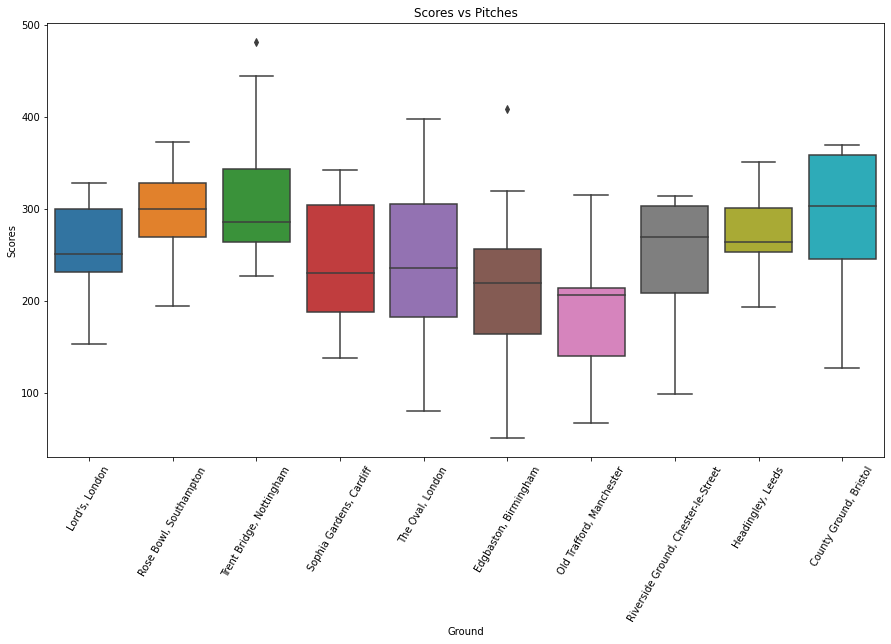

In [ ]:
Scores = [int(item[0]) for item in WC_Grounds_History.Score.str.split("/")]
WC_Grounds_History["Score_without_wickets"] = Scores
Stadium_Scores = WC_Grounds_History[["Score_without_wickets","Ground"]]
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
sns.boxplot(x = "Ground", y = "Score_without_wickets",data = Stadium_Scores).set_title("Scores vs Pitches")
plt.ylabel("Scores")

Analysis: Trent Bridge, Nottingham, County Ground, Bristol and Headingley, Leeds are going to be high scoring matches and Old Trafford,Manchester ,Sophia Gardens,Cardiff ,Edgbaston,Birminghim are low scoring matches

Text(0, 0.5, 'Scores')

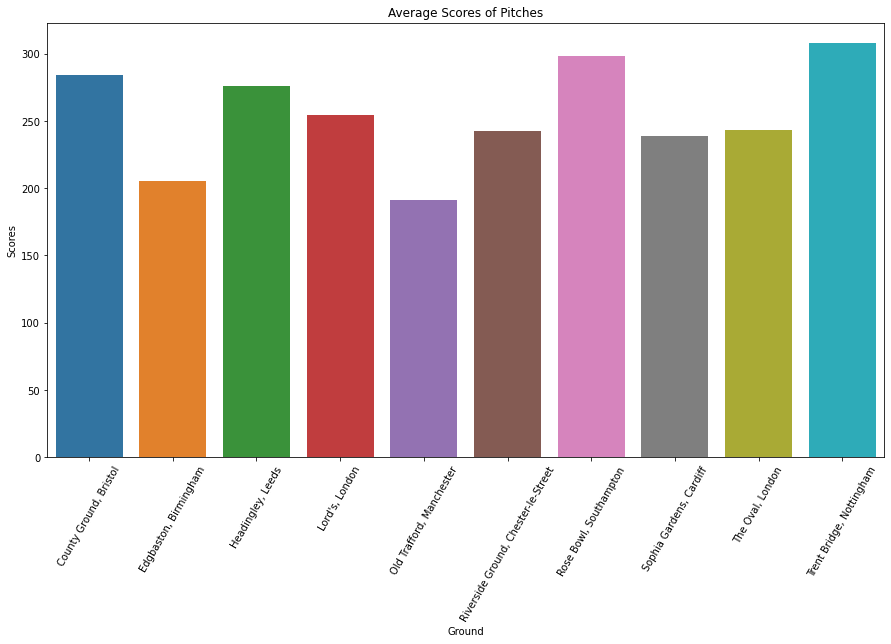

In [ ]:
#creating a barplot of average scores of pitches
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
Stadium_Scores = Stadium_Scores.groupby("Ground").mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Score_without_wickets", data = Stadium_Scores).set_title("Average Scores of Pitches")
plt.xticks(rotation = 60)
plt.ylabel("Scores")

Lets Analyze Batsmen Data
1. Batsmen with Average above 40
2. Batsmen with Best Strike Rate

In [ ]:
Batsman_Data.sample(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
9147,9148,25,25,24,104.16,3,0,v Pakistan,Dambulla,21 Jun 2010,ODI # 2998,Shakib Al Hasan,56143
6629,6630,54,54,45,120.00,5,3,v Sri Lanka,Pallekele,24 Aug 2017,ODI # 3906,Rohit Sharma,34102
10617,10618,7,7,6,116.66,1,0,v Ireland,Belfast,19 Jul 2016,ODI # 3764,Mohammad Shahzad,419873
567,568,4,4,5,80.00,1,0,v Afghanistan,Harare,15 Mar 2018,ODI # 3997,Carlos Brathwaite,457249
6245,6246,47,47,61,77.04,5,0,v South Africa,Rajkot,18 Oct 2015,ODI # 3695,MS Dhoni,28081


In [ ]:
#Removing DNB, and Fetching the Details of Batsmen stats only in England
Batsman_Data.drop(columns=Batsman_Data.columns[0],inplace=True)
Batsman_Data = Batsman_Data[~Batsman_Data.Bat1.isin(["DNB","TDNB"])]
Batsman_Data = Batsman_Data[Batsman_Data.Player_ID.isin(WC_Players_Data.ID)]
stadiums = [item[0] for item in set(WC_Ground_Stats)]
Batsman_Data_in_England = Batsman_Data[Batsman_Data.Ground.isin(stadiums)]
#Calculating Averages
def Out_or_NotOut(value):
    if "*" in value:
        return 0
    else:
        return 1
Batsman_Data_in_England["Out_or_NotOut"] = Batsman_Data_in_England.Bat1.apply(Out_or_NotOut)
change_type = ["Runs","BF","4s","6s"]
for i in change_type:
    Batsman_Data_in_England[i] = Batsman_Data_in_England[i].astype("int")
Batsman_Data_in_England.head()
Batsman_Data_Information = Batsman_Data_in_England
Batsman_Data_in_England = Batsman_Data_in_England.groupby(["Ground","Batsman"]).sum().reset_index()
Batsman_Data_in_England["Average"] = Batsman_Data_in_England["Runs"]/Batsman_Data_in_England.Out_or_NotOut
Batsman_Data_in_England.sort_values(by=["Average"],ascending=False).head(3)

,Ground,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
369,Nottingham,Ravindra Jadeja,12,9,1,0,234675,0,inf
167,Chester-le-Street,Adil Rashid,12,9,2,0,244497,0,inf
389,Southampton,Chris Morris,35,22,3,2,439952,0,inf


In [ ]:
#removing data of players whose avg is infinite
Batsman_Scores = Batsman_Data_in_England.groupby(["Batsman"]).sum().reset_index()
Batsman_Scores["Average"] = Batsman_Scores["Runs"]/Batsman_Scores["Out_or_NotOut"]
Batsman_Scores.sort_values(by = "Average",ascending=False).sample(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
73,Mosaddek Hossain,24,33,4,0,1650399,1,24.000000
48,Junaid Khan,4,22,0,0,1038204,3,1.333333
90,Shakib Al Hasan,195,252,18,1,393001,7,27.857143
94,Soumya Sarkar,34,60,4,1,1746708,4,8.500000
14,Chris Woakes,325,371,16,4,3955760,10,32.500000


In [ ]:
#finding best average of batsmen
Best_Batsman_Average = Batsman_Scores[(Batsman_Scores.Out_or_NotOut>0) & (Batsman_Scores.Average > 40 )]\
.sort_values(by = "Average",ascending = False)
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
35,Imam-ul-Haq,234,263,24,1,2273104,2,117.000000
25,Evin Lewis,200,152,18,9,1295703,2,100.000000
39,Jason Holder,152,121,10,7,1174455,2,76.000000
81,Ravindra Jadeja,281,258,29,5,2346750,4,70.250000
86,Sarfaraz Ahmed,465,502,38,1,2277600,7,66.428571
46,Jonny Bairstow,1439,1295,166,23,9220423,22,65.409091
92,Shikhar Dhawan,976,966,118,13,479995,15,65.066667
52,Kane Williamson,815,849,84,7,3890684,13,62.692308
82,Rohit Sharma,687,829,72,13,511530,12,57.250000
33,Hashim Amla,851,941,94,5,746402,15,56.733333


In [ ]:
Player_WC_ID = Batsman_Data[["Player_ID","Batsman"]].drop_duplicates()


In [ ]:
#Batsman with Average above 40
Player_ID = list(Best_Batsman_Average.merge(Player_WC_ID,how = "left",on = "Batsman")["Player_ID_y"].astype("int"))
Best_Batsman_Average["Player_ID"] = Player_ID
WC_Players_Data.columns = ["Player", "Player_ID","Country"]
Country_Player = list(Best_Batsman_Average.merge(WC_Players_Data,how = "left",on = "Player_ID")["Country"])
Best_Batsman_Average["Country"] = Country_Player
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan
46,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England
92,Shikhar Dhawan,976,966,118,13,28235,15,65.066667,India
52,Kane Williamson,815,849,84,7,277906,13,62.692308,NewZealand
82,Rohit Sharma,687,829,72,13,34102,12,57.250000,India
33,Hashim Amla,851,941,94,5,43906,15,56.733333,SouthAfrica


In [ ]:
#adding strike rate 
Best_Batsman_Average["Strike_Rate"] = Best_Batsman_Average["Runs"]/Best_Batsman_Average["BF"]*100
Best_Batsman_Average.head(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan,88.973384
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India,108.914729
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan,92.629482


Top 5 Batsmen based on Average,
1. Imam-ul-Haq
2. Evin Lewis
3. Jason Holder
4. Ravindra Jadeja
5. Sarfaraz Ahmed

Average is good for the above since they have played very few matches and performed well in those matches.

In [ ]:
#batsmen who has best strike rate
Best_Batsman_Average.sort_values(["Strike_Rate"],ascending = False).head()


,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
25,Evin Lewis,200,152,18,9,431901,2,100.0000,WestIndies,131.578947
39,Jason Holder,152,121,10,7,391485,2,76.0000,WestIndies,125.619835
47,Jos Buttler,1654,1358,147,47,308967,32,51.6875,England,121.796760
28,Fakhar Zaman,452,394,50,11,512191,8,56.5000,Pakistan,114.720812
34,Imad Wasim,224,200,22,5,227758,5,44.8000,Pakistan,112.000000


Top 5 Batsmen based on Strike Rate,
1. Evin Lewis
2. Jason Holder
3. Jos Buttler
4. Fakhar Zaman
5. Imad Wasim

Jos Buttler has good Strike Rate and Good Average.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

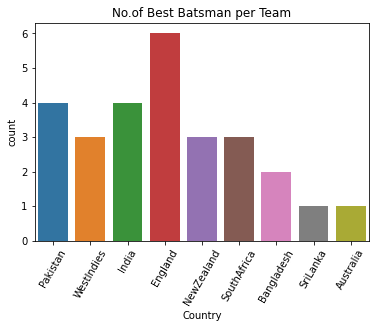

In [ ]:
#number of batsmen in a country who has the avg > 40
sns.countplot(Best_Batsman_Average["Country"]).set_title("No.of Best Batsman per Team")
plt.xticks(rotation = 60)

Analysis: England,India and Pakistan have better batsmen than any other countires

Lets Analyse Bowlers Data

In [ ]:
Bowler_Data.head(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [ ]:
Bowler_Data = Bowler_Data[Bowler_Data.Ground.isin(stadiums)]
Bowler_Data = Bowler_Data[~Bowler_Data.Overs.str.contains('-')]
Bowler_Data.sample(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
7475,7476,10.0,0,60,3,6.00,20.00,20.0,v Australia,Manchester,8 Sep 2015,ODI # 3682,Liam Plunkett,19264
7094,7095,10.0,0,52,3,5.20,17.33,20.0,v New Zealand,Chester-le-Street,20 Jun 2015,ODI # 3659,Ben Stokes,311158
6950,6951,10.0,1,61,0,6.10,-,-,v India,Leeds,5 Sep 2014,ODI # 3525,Chris Woakes,247235
7397,7398,8.0,0,27,5,3.37,5.40,9.6,v Ireland,Bristol,5 May 2017,ODI # 3864,Adil Rashid,244497
6902,6903,10.0,0,75,1,7.50,75.00,60.0,v Pakistan,Nottingham,30 Aug 2016,ODI # 3773,Mark Wood,351588


From the above csv, What does Econ, Ave, SR stand for?

1. Econ : 
    Economy of Bowler means, how many runs does the Bowler concede in one Over?
2. Ave :
    Average for a Bowler means, how many runs conceded by Bowler per wicket.
3. SR :
    Strike Rate refers to no.of balls bowled for gaining the wicket.
4. Mdns :
    Maiden Over refers that the Bowler didn't concede any run.


In [ ]:
#converting balls to overs
def overs_to_ball(value):
    if "." in value:
        over = value.split(".")
        return int(over[0]) * 6 + int(over[1])
    else:
        return int(value) * 6

In [ ]:
Bowler_Data["Balls"] = Bowler_Data.Overs.apply(overs_to_ball)
for i in ["Runs","Mdns","Wkts","Balls"]:
    Bowler_Data[i] = Bowler_Data[i].astype("float")
Bowler_Data.Ground = Bowler_Data.Ground.apply(Full_Ground_names)
Bowlers_Data_in_England = Bowler_Data.groupby(["Bowler"]).sum()[["Runs","Mdns","Wkts","Balls"]].reset_index()

In [ ]:
#creating economy, average and strike rate
Bowlers_Data_in_England["Economy"] = Bowlers_Data_in_England.Runs * 6 /Bowlers_Data_in_England.Balls
Bowlers_Data_in_England["Average"] = Bowlers_Data_in_England.Runs/ Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England["Strike_Rate"] = Bowlers_Data_in_England.Balls / Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
26,Imran Tahir,148.0,0.0,5.0,165.0,5.381818,29.600000,33.000000
12,Colin Munro,10.0,0.0,0.0,6.0,10.000000,inf,inf
6,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000
53,Mitchell Starc,421.0,3.0,11.0,441.0,5.727891,38.272727,40.090909
64,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556


Since we are concentrating mainly on Best Bowlers and Full time Bowlers, Let's remove the Bowlers Data Who have bowled a total of less than 6 overs in England Pitches and taken at least one wicket.

In [ ]:
Bowlers_Data_in_England = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 36) & (Bowlers_Data_in_England.Wkts > 0)]
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
1,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000
2,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333
3,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000
5,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000
6,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000
...,...,...,...,...,...,...,...,...
76,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000
77,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286
78,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333
79,Virat Kohli,120.0,0.0,1.0,108.0,6.666667,120.000000,108.000000


In [ ]:
#adding a column of player id 
Player_WC_ID = Bowler_Data[["Player_ID","Bowler"]].drop_duplicates()

Bowlers_Data_in_England = Bowlers_Data_in_England.merge(Player_WC_ID,how = "left",on = "Bowler")

Country_Player = list(Bowlers_Data_in_England.merge(WC_Players_Data,how = "left",on = "Player_ID")["Country"])
Bowlers_Data_in_England["Country"] = Country_Player
Bowlers_Data_in_England.iloc[57,-1] = "SriLanka"
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,Australia
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,England
2,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000,540316,SouthAfrica
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka
4,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000,315594,WestIndies
...,...,...,...,...,...,...,...,...,...,...
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,England
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,NewZealand
62,Virat Kohli,120.0,0.0,1.0,108.0,6.666667,120.000000,108.000000,253802,India


In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Mdns"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,SriLanka
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India
35,Mark Wood,1234.0,10.0,28.0,1351.0,5.480385,44.071429,48.250000,351588,England
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,England
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,Bangladesh
40,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.218750,8917,England
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,India
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.000000,550215,SouthAfrica


Here, If we observe Bhuvneshwar Kumar, 
His maiden Overs are less, but he bowled few overs compared to others. So we should consider no.of maidens per total Overs. Then, it's correct way to judge.

In [ ]:
Bowlers_Data_in_England["Maidens_per_Overs_Percentage"] = \
((Bowlers_Data_in_England.Mdns*6)/(Bowlers_Data_in_England.Balls))*100
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
23,Jhye Richardson,214.0,1.0,5.0,162.0,7.925926,42.800000,32.400000,774223,Australia,3.703704
54,Shakib Al Hasan,318.0,0.0,4.0,342.0,5.578947,79.500000,85.500000,56143,Bangladesh,0.000000
5,Ben Stokes,1224.0,1.0,30.0,1189.0,6.176619,40.800000,39.633333,311158,England,0.504626
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,Bangladesh,5.940594


In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Maidens_per_Overs_Percentage"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.000000,550215,SouthAfrica,9.615385
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India,9.523810
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,Australia,8.108108
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand,7.884363
46,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,Australia,7.692308
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,SriLanka,6.394316
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,Bangladesh,5.940594
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
25,Junaid Khan,399.0,4.0,11.0,429.0,5.580420,36.272727,39.000000,259551,Pakistan,5.594406


In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Average"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
31,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,India,0.000000
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,India,3.076923
29,Kedar Jadhav,67.0,0.0,3.0,72.0,5.583333,22.333333,24.000000,290716,India,0.000000
44,Mosaddek Hossain,73.0,0.0,3.0,74.0,5.918919,24.333333,24.666667,550133,Bangladesh,0.000000
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
27,Kane Richardson,156.0,1.0,6.0,156.0,6.000000,26.000000,26.000000,272262,Australia,3.846154
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,NewZealand,2.272727
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,India,3.521127
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,Pakistan,2.702703
56,Steve Smith,191.0,0.0,7.0,228.0,5.026316,27.285714,32.571429,267192,Australia,0.000000


In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Economy"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
47,Nathan Lyon,70.0,0.0,1.0,102.0,4.117647,70.000000,102.000000,272279,Australia,0.000000
55,Shoaib Malik,376.0,3.0,11.0,504.0,4.476190,34.181818,45.818182,42657,Pakistan,3.571429
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India,9.523810
63,Yuzvendra Chahal,135.0,0.0,2.0,180.0,4.500000,67.500000,90.000000,430246,India,0.000000
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka,1.960784
41,Mohammad Hafeez,540.0,1.0,10.0,711.0,4.556962,54.000000,71.100000,41434,Pakistan,0.843882
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,India,3.076923
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
7,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333,51880,WestIndies,2.120141
46,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,Australia,7.692308


In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Strike_Rate"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
31,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,India,0.000000
29,Kedar Jadhav,67.0,0.0,3.0,72.0,5.583333,22.333333,24.000000,290716,India,0.000000
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,India,3.076923
44,Mosaddek Hossain,73.0,0.0,3.0,74.0,5.918919,24.333333,24.666667,550133,Bangladesh,0.000000
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,England,3.333333
27,Kane Richardson,156.0,1.0,6.0,156.0,6.000000,26.000000,26.000000,272262,Australia,3.846154
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,Pakistan,2.702703
22,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,SriLanka,0.000000
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,NewZealand,2.272727
42,Mohammad Hasnain,80.0,0.0,2.0,60.0,8.000000,40.000000,30.000000,1158100,Pakistan,0.000000


In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Wkts"],ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,England,0.755668
33,Liam Plunkett,2033.0,3.0,68.0,2071.0,5.889908,29.897059,30.455882,19264,England,0.869145
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,England,3.931204
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,SriLanka,6.394316
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
40,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.218750,8917,England,1.866833
5,Ben Stokes,1224.0,1.0,30.0,1189.0,6.176619,40.800000,39.633333,311158,England,0.504626
35,Mark Wood,1234.0,10.0,28.0,1351.0,5.480385,44.071429,48.250000,351588,England,4.441155
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,India,3.521127
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand,7.884363


In [ ]:
aggregations = {
    'Runs':'sum',
    'Mdns':'sum',
    'Wkts':'sum',
    'Balls':'sum',
    'Economy': 'mean',
    'Average':'mean',
    'Strike_Rate':'mean',
    'Maidens_per_Overs_Percentage':'mean'
}
Bowlers_Data_in_England_TeamWise = Bowlers_Data_in_England.groupby('Country').agg(aggregations).reset_index()
Bowlers_Data_in_England_TeamWise

,Country,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Maidens_per_Overs_Percentage
0,Australia,2175.0,12.0,60.0,2300.0,5.631351,42.014177,46.166234,3.249520
1,Bangladesh,1358.0,6.0,22.0,1484.0,5.778804,79.500000,81.583333,1.188119
2,England,11467.0,43.0,318.0,11942.0,5.920822,40.538542,41.417132,2.381099
3,India,2467.0,19.0,77.0,2901.0,5.255050,47.922222,52.581173,2.236536
4,NewZealand,1782.0,11.0,53.0,1769.0,6.263260,37.813667,35.754667,2.031418
5,Pakistan,2999.0,12.0,74.0,3366.0,6.028354,56.615722,54.646572,1.536407
6,SouthAfrica,1511.0,12.0,40.0,1681.0,5.552081,41.977381,45.035714,3.355573
7,SriLanka,2592.0,14.0,78.0,2721.0,5.701535,39.753114,42.422306,1.564634
8,WestIndies,885.0,6.0,21.0,969.0,5.903939,84.433333,76.683333,6.780035


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

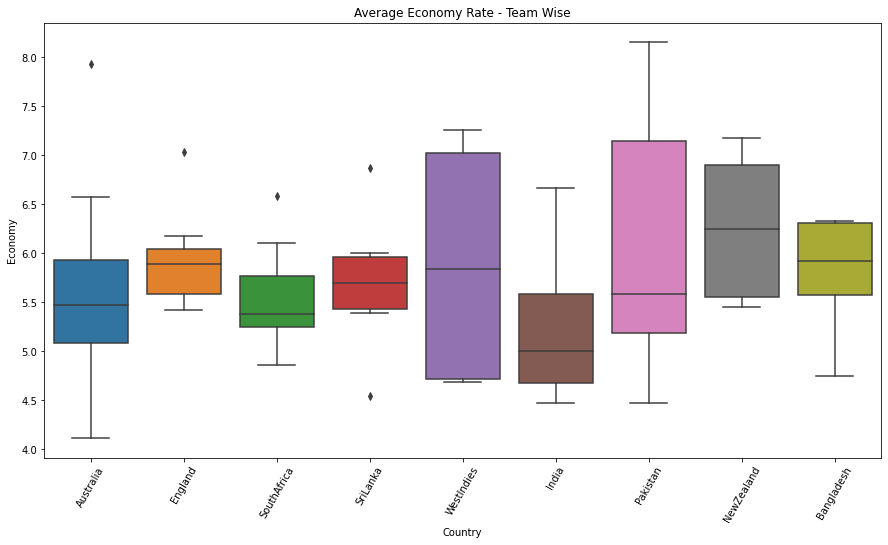

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "Country", y = "Economy", data = Bowlers_Data_in_England).set_title("Average Economy Rate - Team Wise")
plt.xticks(rotation = 60)

As you see,
1. Batsmen can target High Economy Rate Teams like, Bangladesh, New Zealand, West Indies
2. India, South Africa, Australia have good Economy Rates

Insights
1. When Playing against India, it's difficult to score high runs, even thoug India may not take wickets but they will restrict opponents to a less score.
2. South Africa seems to be the Best Team in terms of Bowling.
3. Teams can score more while playing against Bangladesh and West Indies.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
Bowlers_Data_in_England_TeamWise

,Country,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Maidens_per_Overs_Percentage
0,Australia,2175.0,12.0,60.0,2300.0,5.631351,42.014177,46.166234,3.249520
1,Bangladesh,1358.0,6.0,22.0,1484.0,5.778804,79.500000,81.583333,1.188119
2,England,11467.0,43.0,318.0,11942.0,5.920822,40.538542,41.417132,2.381099
3,India,2467.0,19.0,77.0,2901.0,5.255050,47.922222,52.581173,2.236536
4,NewZealand,1782.0,11.0,53.0,1769.0,6.263260,37.813667,35.754667,2.031418
5,Pakistan,2999.0,12.0,74.0,3366.0,6.028354,56.615722,54.646572,1.536407
6,SouthAfrica,1511.0,12.0,40.0,1681.0,5.552081,41.977381,45.035714,3.355573
7,SriLanka,2592.0,14.0,78.0,2721.0,5.701535,39.753114,42.422306,1.564634
8,WestIndies,885.0,6.0,21.0,969.0,5.903939,84.433333,76.683333,6.780035


So now, let's see Which Country has Best Bowlers in their Team.
Best Bowlers : Qualifying Criteria,
1. Minimum no.of Balls Bowled : 150
2. Average Less than 40
3. Strike Rate Less than 40
4. Economy Rate Less than 7.5

In [ ]:
Best_Bowlers_Data = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
                        (Bowlers_Data_in_England.Average < 40) &\
                        (Bowlers_Data_in_England.Strike_Rate < 40)&\
                        (Bowlers_Data_in_England.Economy < 7.5)
                        
                       ]
Best_Bowlers_Data

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,England,0.755668
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka,1.960784
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India,9.523810
7,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333,51880,WestIndies,2.120141
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
10,Dale Steyn,324.0,3.0,10.0,364.0,5.340659,32.400000,36.400000,47492,SouthAfrica,4.945055
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,England,3.931204
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,Pakistan,2.702703
18,Imran Tahir,148.0,0.0,5.0,165.0,5.381818,29.600000,33.000000,40618,SouthAfrica,0.000000
22,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,SriLanka,0.000000


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

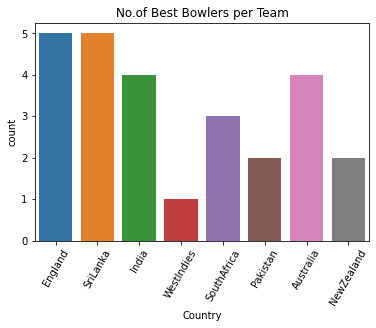

In [ ]:
#countplot of best bowlers per country
sns.countplot(Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
                        (Bowlers_Data_in_England.Average < 40) &\
                        (Bowlers_Data_in_England.Strike_Rate < 40)&\
                        (Bowlers_Data_in_England.Economy < 7.5)].Country).\
set_title("No.of Best Bowlers per Team")
plt.xticks(rotation = 60)

1. England seems to be best in both, Batting and Bowling Department.
2. India seems to be tough Oppostion for England.